# Lab 3 - Data Analysis Pipeline

**Notebook:** `03_analysis_pipeline.ipynb`  
**Objective:** We implement the **third pipeline**: perform **descriptive analysis** on aggregated datasets from the Exploitation Zone and generate **visual dashboards** using `matplotlib` and `seaborn`. This analysis reveals patterns across space and time for tourist housing, household structure, and commercial activity.

### Group: *L3-T04*

#### Group Members: **Marvin Ernst, Oriol Gelabert, Alex Malo**  
Class: **23D020 - Big Data Management for Data Science**  
Date: *June 23, 2025*

In this notebook we address the **B.1 Analysis Task**:
- **Descriptive Analysis**: Use statistical summaries and charts to explore household demographics, commercial indicators, and tourism licenses.
- **Dashboarding**: Create static visualizations that highlight trends and support decision-making by local authorities or urban planners.

---

### Steps in this pipeline:

1. **Setup and Load Data**  
   Load libraries, create a Spark session, and read aggregated datasets from the Exploitation Zone.

2. **Descriptive Analysis**  
   - Analyze household sizes by district  
   - Evaluate prevalence of commercial indicators like coworking and nightlife  
   - Explore spatial patterns in tourist housing licenses

3. **Data Visualization (Dashboarding)**  
   - Bar plots for size distributions and indicator prevalence  
   - Scatter plots to identify relationships between datasets  
   - Annotated figures to support storytelling and interpretation

---

All visualizations are generated from data in the **Exploitation Zone**, ensuring consistency and reproducibility of results.

### Setup

First, we load all the relevant libraries:

In [ ]:
import os
from pathlib import Path

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob

import pandas.io.formats.style

#### Create Spark Session

In [11]:
spark = SparkSession.builder.getOrCreate()

#### Define Folder Paths

In [12]:
project_root = Path().resolve().parent
exploitation = project_root / "exploitation_zone"

## **Descriptive Analysis**

We now compute summary statistics on the main datasets to explore data distributions, count totals, and check for outliers or irregularities.

#### **Household Size Distribution**

We load household data and convert to Pandas:

In [ ]:
df_household_dis = spark.read.parquet(f"{exploitation}/households_districte_2022.parquet")
pdf_household_dis = df_household_dis.toPandas()

And we how summary stats for household size distribution:

In [ ]:
print("Descriptive statistics for household counts by district:")
pdf_household_dis.groupby("DES_DISTRICTE")["NUM_VALOR"].describe()

Descriptive statistics for household counts by district:


,count,mean,std,min,25%,50%,75%,max
DES_DISTRICTE,,,,,,,,
ciutat vella,9.0,4549.000000,5586.731021,286.0,505.0,1895.0,5836.0,15979.0
eixample,9.0,12512.333333,14834.308149,356.0,763.0,4543.0,19621.0,38275.0
gracia,9.0,5874.888889,7168.646219,99.0,228.0,1918.0,9153.0,18697.0
horta-guinardo,9.0,7794.444444,8934.563967,196.0,433.0,2720.0,13497.0,21348.0
les corts,9.0,3645.555556,4106.853483,86.0,158.0,1517.0,6103.0,9869.0
nou barris,9.0,7440.333333,8210.112225,293.0,590.0,3151.0,12661.0,19946.0
sant andreu,9.0,6666.666667,7451.179017,201.0,399.0,2392.0,11950.0,17929.0
sant marti,9.0,10615.888889,11875.709605,300.0,677.0,3996.0,18560.0,28392.0
sants-montjuic,9.0,8277.777778,9524.982202,300.0,600.0,3085.0,13516.0,23841.0


**Null and Uniqueness Checks:**

In [20]:
print("Null values in household dataset:")
print(pdf_household_dis.isnull().sum())
print("\nUnique values in household dataset:")
print(pdf_household_dis.nunique())

Null values in household dataset:
COD_DISTRICTE             0
DES_DISTRICTE             0
NUM_PERSONES_AGG          0
TOTAL_PERSONES_AGG        0
NUM_VALOR                 0
PCT_PERSONES_DISTRICTE    0
PCT_VIVENDES_DISTRICTE    0
dtype: int64

Unique values in household dataset:
COD_DISTRICTE             10
DES_DISTRICTE             10
NUM_PERSONES_AGG           9
TOTAL_PERSONES_AGG        89
NUM_VALOR                 89
PCT_PERSONES_DISTRICTE    90
PCT_VIVENDES_DISTRICTE    90
dtype: int64


#### **Commercial Indicators Stats**

We load commercial indicator data:

In [14]:
df_com_dis = spark.read.parquet(f"{exploitation}/comercial_indicators_district_2022.parquet")
pdf_com_dis = df_com_dis.toPandas()

In [15]:
print("Available columns in commercial indicators DataFrame:")
print(pdf_com_dis.columns.tolist())

Available columns in commercial indicators DataFrame:
['DES_ACTIVITAT_PRINCIPAL', 'DES_GRUP', 'COD_DISTRICTE', 'TOTAL', 'TOTAL_IND_OCI_NOCTURN', 'TOTAL_IND_COWORKING', 'TOTAL_IND_SERVEI_DEGUSTACIO', 'TOTAL_IND_OBERT24H', 'TOTAL_IND_MIXT', 'TOTAL_IND_PEU_CARRER', 'TOTAL_IND_MERCAT', 'TOTAL_IND_GALERIA', 'TOTAL_IND_CENTRE_COMERCIAL', 'TOTAL_IND_EIX_COMERCIAL']


And also here we show summary stats for commercial indicators:

In [16]:
print(pdf_com_dis[["TOTAL_IND_COWORKING", "TOTAL_IND_OCI_NOCTURN"]].describe())

       TOTAL_IND_COWORKING  TOTAL_IND_OCI_NOCTURN
count           159.000000             159.000000
mean              2.037736               1.377358
std               8.622084               5.871708
min               0.000000               0.000000
25%               0.000000               0.000000
50%               0.000000               0.000000
75%               1.000000               0.000000
max              92.000000              42.000000


**Null and Uniqueness Checks:**

In [21]:
print("\nNull values in commercial indicators dataset:")
print(pdf_com_dis.isnull().sum())
print("\nUnique values in commercial indicators dataset:")
print(pdf_com_dis.nunique())


Null values in commercial indicators dataset:
DES_ACTIVITAT_PRINCIPAL        0
DES_GRUP                       0
COD_DISTRICTE                  0
TOTAL                          0
TOTAL_IND_OCI_NOCTURN          0
TOTAL_IND_COWORKING            0
TOTAL_IND_SERVEI_DEGUSTACIO    0
TOTAL_IND_OBERT24H             0
TOTAL_IND_MIXT                 0
TOTAL_IND_PEU_CARRER           0
TOTAL_IND_MERCAT               0
TOTAL_IND_GALERIA              0
TOTAL_IND_CENTRE_COMERCIAL     0
TOTAL_IND_EIX_COMERCIAL        0
dtype: int64

Unique values in commercial indicators dataset:
DES_ACTIVITAT_PRINCIPAL          2
DES_GRUP                        16
COD_DISTRICTE                   10
TOTAL                          131
TOTAL_IND_OCI_NOCTURN           13
TOTAL_IND_COWORKING             16
TOTAL_IND_SERVEI_DEGUSTACIO     22
TOTAL_IND_OBERT24H              13
TOTAL_IND_MIXT                   5
TOTAL_IND_PEU_CARRER           133
TOTAL_IND_MERCAT                29
TOTAL_IND_GALERIA               16
TOTAL_IND

####  **Tourist Licenses Distributions**

We load tourist housing data:

In [ ]:
df_hut_dis = spark.read.parquet(f"{exploitation}/hut_district_2022_1T.parquet")
pdf_hut_dis = df_hut_dis.toPandas()

We show distribution of tourist licenses:

In [ ]:
print("Tourist license counts by district:")
pdf_hut_dis.describe()

Tourist license counts by district:


,TOTAL
count,10.000000
mean,936.300000
std,1281.534848
min,29.000000
25%,227.750000
50%,548.000000
75%,1103.750000
max,4378.000000


**Null and Uniqueness Checks:**

In [22]:
print("\nNull values in tourist licenses dataset:")
print(pdf_hut_dis.isnull().sum())
print("\nUnique values in tourist licenses dataset:")
print(pdf_hut_dis.nunique())


Null values in tourist licenses dataset:
COD_DISTRICTE    0
TOTAL            0
dtype: int64

Unique values in tourist licenses dataset:
COD_DISTRICTE    10
TOTAL            10
dtype: int64


## **Dashboarding**

Here we visually tell a ”data story” and we want to ensure the dashboards provide meaningful insights and support decision-making.

### **Household Composition by District**
Here, we plot distribution of household sizes by district:

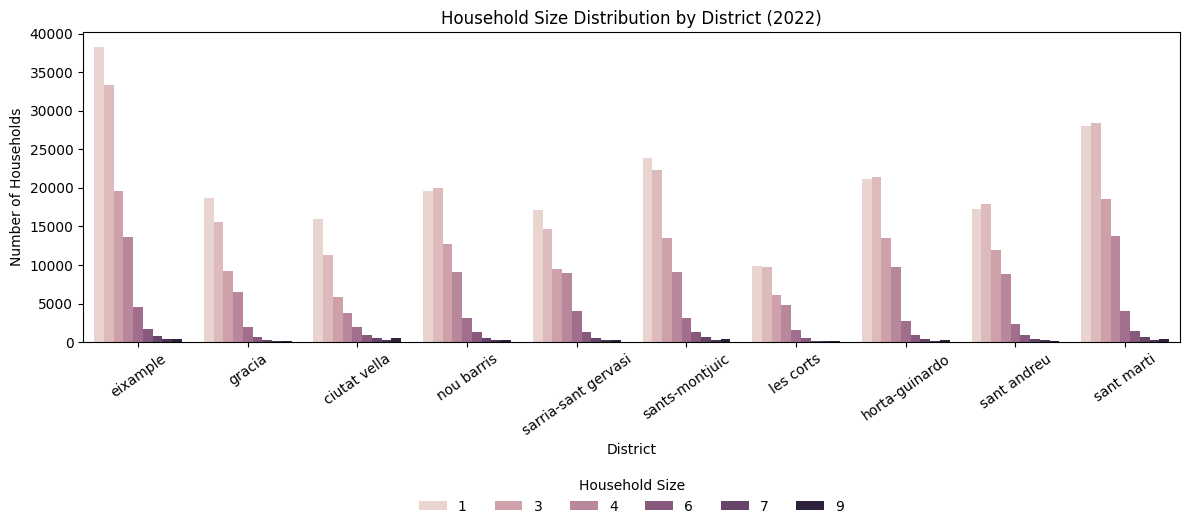

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=pdf_household_dis,
    x="DES_DISTRICTE",
    y="NUM_VALOR",
    hue="NUM_PERSONES_AGG"
)
plt.title("Household Size Distribution by District (2022)")
plt.xlabel("District")
plt.ylabel("Number of Households")
plt.xticks(rotation=35)

plt.legend(
    title="Household Size",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.4),
    ncol=6,
    frameon=False
)

plt.tight_layout()
plt.show()

In [43]:
print("Unique household sizes:", sorted(pdf_household_dis["NUM_PERSONES_AGG"].unique()))

Unique household sizes: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9)]


From this we can see that single-person households dominate across all districts, especially in Eixample, Sants-Montjuïc, and Sant Martí. Larger household sizes (6 or more people) are relatively rare, with only a small presence in districts like Nou Barris and Ciutat Vella, suggesting limited availability or affordability of large living spaces.

### **Commercial Premises per District**

First we need to compute percentages:

In [45]:
pdf_com_dis["PCT_IND_COWORKING"] = (pdf_com_dis["TOTAL_IND_COWORKING"] / pdf_com_dis["TOTAL"]) * 100
pdf_com_dis["PCT_IND_OCI_NOCTURN"] = (pdf_com_dis["TOTAL_IND_OCI_NOCTURN"] / pdf_com_dis["TOTAL"]) * 100

Now, we show average % coworking and nightlife by district:

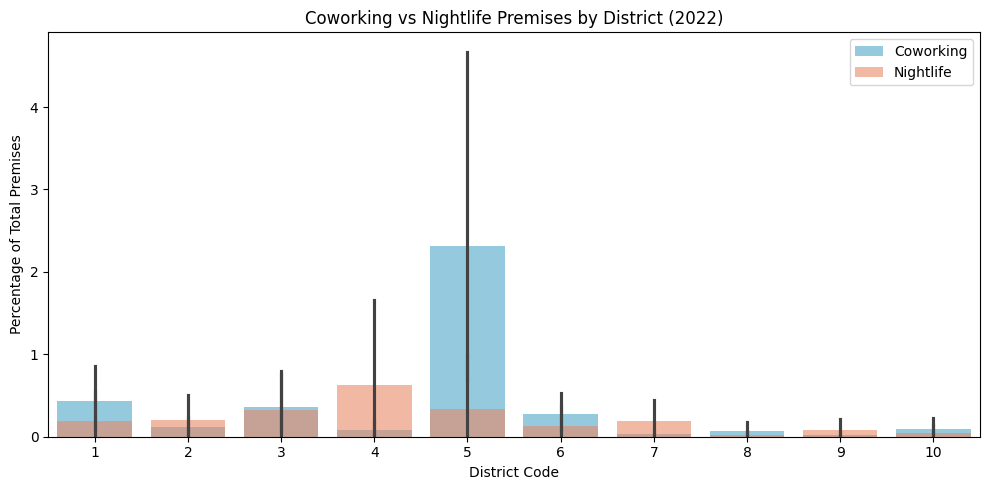

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=pdf_com_dis,
    x="COD_DISTRICTE",
    y="PCT_IND_COWORKING",
    color="skyblue",
    label="Coworking"
)
sns.barplot(
    data=pdf_com_dis,
    x="COD_DISTRICTE",
    y="PCT_IND_OCI_NOCTURN",
    color="coral",
    label="Nightlife",
    alpha=0.6
)
plt.title("Coworking vs Nightlife Premises by District (2022)")
plt.xlabel("District Code")
plt.ylabel("Percentage of Total Premises")
plt.legend()
plt.tight_layout()
plt.show()

This shows us that District 5 (Eixample) has a significantly higher percentage of coworking spaces than any other district, suggesting it is a major hub for flexible workspaces. In contrast, nightlife-related premises are more evenly distributed, but still slightly concentrated in districts 4 (Ciutat Vella) and 5, reflecting the urban activity in central areas.

Note that the black bars in the middle of each bar are error bar (95% confidence interval) around the estimated mean value.

### **Tourist Licenses by District**



We plot number of licenses per district:

/var/folders/mf/w_wd3t0951z162wpkh1xbddc0000gn/T/ipykernel_96297/2768034204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


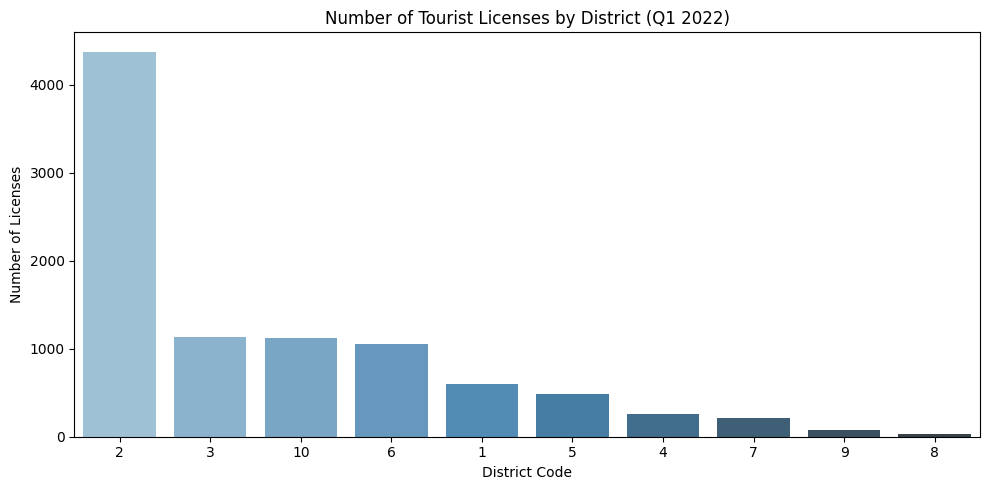

In [47]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=pdf_hut_dis.sort_values("TOTAL", ascending=False),
    x="COD_DISTRICTE",
    y="TOTAL",
    palette="Blues_d"
)
plt.title("Number of Tourist Licenses by District (Q1 2022)")
plt.xlabel("District Code")
plt.ylabel("Number of Licenses")
plt.tight_layout()
plt.show()

We can see that District 2 (Eixample) has by far the highest number of tourist licenses in Q1 2022, far surpassing all other districts. This suggests a strong concentration of tourist accommodations in central areas, potentially linked to accessibility, attractions, or real estate dynamics.

### **Correlation Between Tourist Activity and Commercial Uses**

We investigate whether districts with more **tourist housing licenses** also show higher prevalence of **coworking** and **nightlife** commercial spaces.

These scatter plots visualize the relationship between:
- the **number of tourist licenses** per district
- and the **percentage of coworking or nightlife premises** in the same district.

We merge tourist licenses and coworking/nightlife presence:

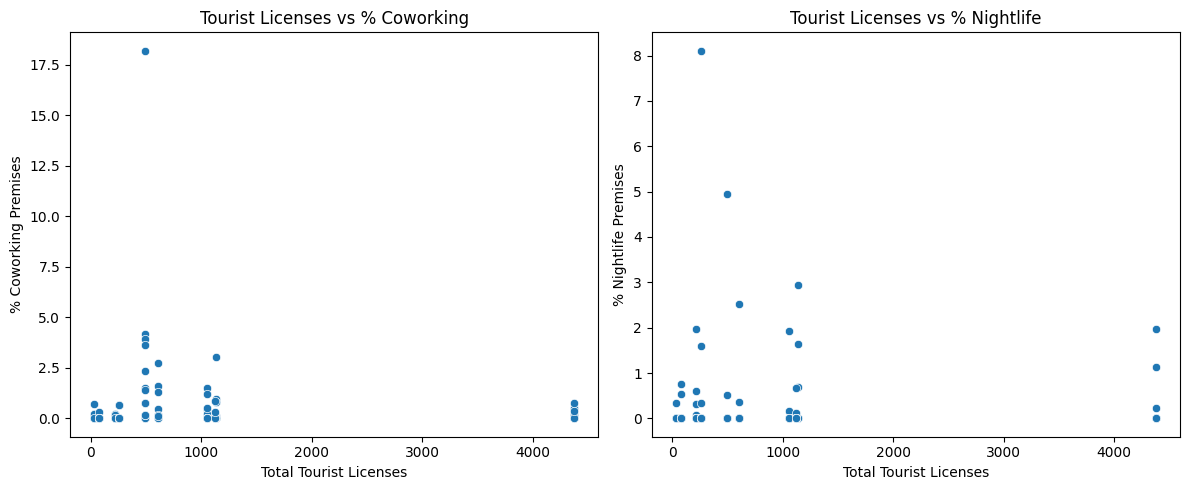

In [51]:
# First, ensure the district code types match before merging:
pdf_com_dis['COD_DISTRICTE'] = pdf_com_dis['COD_DISTRICTE'].astype(int)
pdf_hut_dis['COD_DISTRICTE'] = pdf_hut_dis['COD_DISTRICTE'].astype(int)

# Merge tourist housing and commercial indicators:
merged_df = pdf_hut_dis.merge(
    pdf_com_dis[['COD_DISTRICTE', 'PCT_IND_COWORKING', 'PCT_IND_OCI_NOCTURN']],
    on="COD_DISTRICTE", how="left"
)

# Scatter plot: Tourist Licenses vs Commercial Indicators
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_df, x="TOTAL", y="PCT_IND_COWORKING")
plt.title("Tourist Licenses vs % Coworking")
plt.xlabel("Total Tourist Licenses")
plt.ylabel("% Coworking Premises")

plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_df, x="TOTAL", y="PCT_IND_OCI_NOCTURN")
plt.title("Tourist Licenses vs % Nightlife")
plt.xlabel("Total Tourist Licenses")
plt.ylabel("% Nightlife Premises")

plt.tight_layout()
plt.show()

We can see that there is no strong linear relationship between the number of tourist licenses and the percentage of coworking or nightlife premises in a district.  
However, districts with higher tourism activity tend to also have non-zero presence of these commercial types, suggesting a possible co-location pattern rather than direct proportionality.

### **Tourist Housing Trends Over Time**

We analyze the number of tourist housing licenses over multiple quarters and districts to uncover growth patterns.

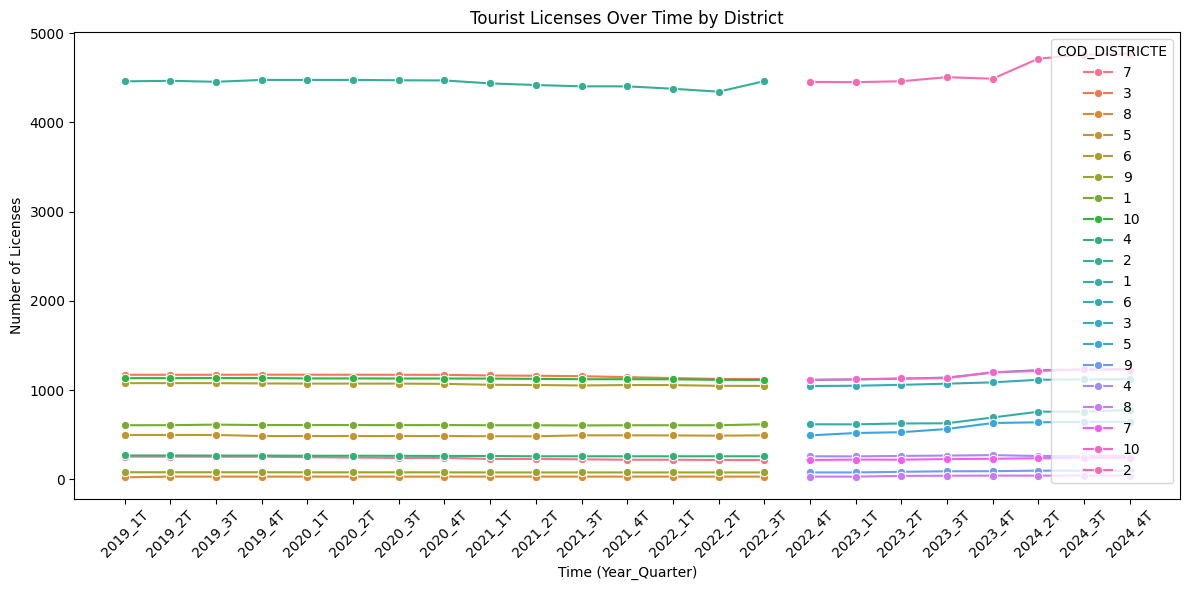

In [ ]:
# We collect all quarterly HUT files from the exploitation zone
hut_files = sorted(glob(f"{exploitation}/hut_district_20*_*.parquet"))

dfs = []
for file in hut_files:
    name = os.path.basename(file).replace("hut_district_", "").replace(".parquet", "")
    year, quarter = name.split("_")
    df_temp = spark.read.parquet(file).toPandas()
    df_temp["YEAR"] = int(year)
    df_temp["QUARTER"] = quarter
    dfs.append(df_temp)

df_hut_time = pd.concat(dfs, ignore_index=True)

# Optional: sort quarters
quarter_order = ["1T", "2T", "3T", "4T"]
df_hut_time["QUARTER"] = pd.Categorical(df_hut_time["QUARTER"], categories=quarter_order, ordered=True)
df_hut_time["TIME"] = df_hut_time["YEAR"].astype(str) + "_" + df_hut_time["QUARTER"].astype(str)

# We plot total tourist licenses per quarter
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hut_time, x="TIME", y="TOTAL", hue="COD_DISTRICTE", marker="o")
plt.title("Tourist Licenses Over Time by District")
plt.xlabel("Time (Year_Quarter)")
plt.ylabel("Number of Licenses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that the number of tourist licenses remained stable in most districts over time, with a notable increase starting in 2023 for a few districts - especially district 7.

### **Distribution of Tourist Housing Licenses**

We inspect the distribution of license counts across districts to assess skewness and concentration.

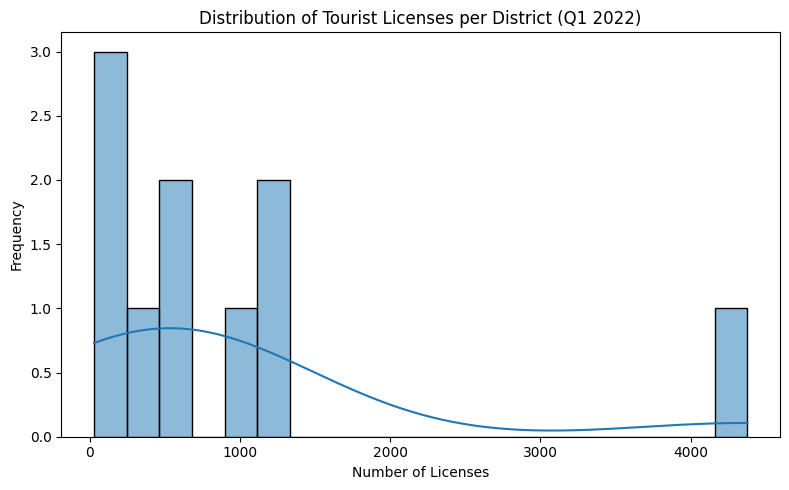

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(pdf_hut_dis["TOTAL"], bins=20, kde=True)  # we have to use the Pandas DataFrame here
plt.title("Distribution of Tourist Licenses per District (Q1 2022)")
plt.xlabel("Number of Licenses")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

We can see that the distribution of tourist licenses across districts is highly right-skewed, with most districts having relatively few licenses and only one or two with exceptionally high numbers.

### **KPI Summary Table**

We combine multiple KPIs for each district, providing an at-a-glance comparison of household size, tourism pressure, and commercial features.

In [ ]:
# We compute average household size per district:
avg_household = pdf_household_dis.groupby("COD_DISTRICTE").apply(
    lambda g: (g["NUM_PERSONES_AGG"] * g["NUM_VALOR"]).sum() / g["NUM_VALOR"].sum()
).reset_index(name="AVG_HOUSEHOLD_SIZE")

# We join with tourist housing:
df_kpi = pdf_hut_dis.merge(avg_household, on="COD_DISTRICTE", how="left")

# We also merge commercial indicators (PCT already computed):
df_kpi = df_kpi.merge(
    pdf_com_dis[["COD_DISTRICTE", "TOTAL", "TOTAL_IND_COWORKING", "TOTAL_IND_OCI_NOCTURN"]],
    on="COD_DISTRICTE", how="left"
)

df_kpi = df_kpi.rename(columns={"TOTAL_x": "NUM_TOURIST_LICENSES", "TOTAL_y": "NUM_COMMERCIAL_PREMISES"})

# to see all columns:
pd.set_option("display.max_rows", None)

# Display final KPI table:
df_kpi_sorted = df_kpi.sort_values("NUM_TOURIST_LICENSES", ascending=False)
df_kpi_sorted[["COD_DISTRICTE", "NUM_TOURIST_LICENSES", "NUM_COMMERCIAL_PREMISES", 
               "TOTAL_IND_COWORKING", "TOTAL_IND_OCI_NOCTURN", "AVG_HOUSEHOLD_SIZE"]]

/var/folders/mf/w_wd3t0951z162wpkh1xbddc0000gn/T/ipykernel_96297/1910876596.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_household = pdf_household_dis.groupby("COD_DISTRICTE").apply(


,COD_DISTRICTE,NUM_TOURIST_LICENSES,NUM_COMMERCIAL_PREMISES,TOTAL_IND_COWORKING,TOTAL_IND_OCI_NOCTURN,AVG_HOUSEHOLD_SIZE
158,2,4378,274,1,0,2.337383
150,2,4378,444,0,0,2.337383
143,2,4378,1637,0,0,2.337383
144,2,4378,201,1,0,2.337383
145,2,4378,1377,2,3,2.337383
146,2,4378,126,0,0,2.337383
147,2,4378,546,0,0,2.337383
149,2,4378,4001,30,0,2.337383
148,2,4378,483,0,0,2.337383
151,2,4378,1040,0,0,2.337383


25/06/24 06:14:51 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 2055405 ms exceeds timeout 120000 ms
25/06/24 06:14:51 WARN SparkContext: Killing executors is not supported by current scheduler.
25/06/24 06:14:51 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1240)
	at 